[[-4.16757847e-01 -5.62668272e-02]
 [-2.13619610e+00  1.64027081e+00]
 [-1.79343559e+00 -8.41747366e-01]
 [ 5.02881417e-01 -1.24528809e+00]
 [-1.05795222e+00 -9.09007615e-01]
 [ 5.51454045e-01  2.29220801e+00]
 [ 4.15393930e-02 -1.11792545e+00]
 [ 5.39058321e-01 -5.96159700e-01]
 [-1.91304965e-02  1.17500122e+00]
 [-7.47870949e-01  9.02525097e-03]
 [-8.78107893e-01 -1.56434170e-01]
 [ 2.56570452e-01 -9.88779049e-01]
 [-3.38821966e-01 -2.36184031e-01]
 [-6.37655012e-01 -1.18761229e+00]
 [-1.42121723e+00 -1.53495196e-01]
 [-2.69056960e-01  2.23136679e+00]
 [-2.43476758e+00  1.12726505e-01]
 [ 3.70444537e-01  1.35963386e+00]
 [ 5.01857207e-01 -8.44213704e-01]
 [ 9.76147160e-06  5.42352572e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-1.86809065e+00  1.73118467e+00]
 [ 1.46767801e+00 -3.35677339e-01]
 [ 6.11340780e-01  4.79705919e-02]
 [-8.29135289e-01  8.77102184e-02]
 [ 1.00036589e+00 -3.81092518e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [ 4.33496330e-01  1.27837923e+00]
 [-6.34679305e-01  5

<function matplotlib.pyplot.show(*args, **kw)>

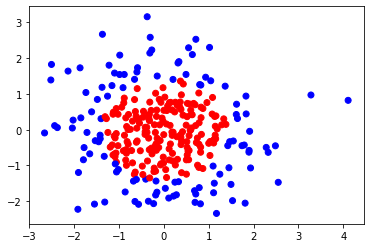

In [4]:
#0导入模块，生成模拟数据集
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt
BATCH_SIZE=30
seed=2
#基于seed产生随机数
rdm=np.random.RandomState(seed)
#随机数返回300行2列的矩阵，表示300组坐标点（x0，x1）作为输入数据集
X=rdm.randn(300,2)
#从X这个300行2列的矩阵中取出一行，判断如果两个坐标的平方和小于2，给Y赋值1，其余赋值0作为输入数据集的标签（正确答案）
Y_=[int(x0*x0+x1*x1<2) for (x0,x1) in X]
#遍历Y中的每个元素，1赋值‘red’其余赋值‘blue’，这样可视化时人可以显著区分
Y_c=[['red' if y else 'blue'] for y in Y_]
#对数据集X和标签Y进行shape整理，第一个元素为-1表示，随第二个参数计算得到，第二个元素表示多少列
#把X整理为n行2列，把Y整理为n行1列
X=np.vstack(X).reshape(-1,2)
Y_=np.vstack(Y_).reshape(-1,1)
print(X)
print(Y_)
print(Y_c)
#用plt.scatter画出数据集X各行中第0列元素和第1列元素的点即各行的（x0,x1），用各行Y_c对应的值表示颜色（c是color的缩写）
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.show

    

After 0 steps,loss is:3.278940
After 2000 steps,loss is:0.784763
After 4000 steps,loss is:0.299683
After 6000 steps,loss is:0.132374
After 8000 steps,loss is:0.092023
After 10000 steps,loss is:0.082996
After 12000 steps,loss is:0.079530
After 14000 steps,loss is:0.076793
After 16000 steps,loss is:0.074479
After 18000 steps,loss is:0.072107
After 20000 steps,loss is:0.070691
After 22000 steps,loss is:0.069710
After 24000 steps,loss is:0.069134
After 26000 steps,loss is:0.068679
After 28000 steps,loss is:0.068291
After 30000 steps,loss is:0.067909
After 32000 steps,loss is:0.067440
After 34000 steps,loss is:0.067216
After 36000 steps,loss is:0.067016
After 38000 steps,loss is:0.066816
w1:
 [[-0.9839698   0.681536   -1.317569   -0.32396403  1.4708283  -0.6741648
   0.7180936   0.95444834  1.3658873  -1.539191   -0.5203823 ]
 [ 0.98607355 -0.07420948  1.8167068   0.10305353  0.55937636 -0.83538723
   0.12345829 -0.04407206  0.3669897  -0.04894971 -1.1669602 ]]
b1:
 [-0.12219279 -0.01132041

<function matplotlib.pyplot.show(*args, **kw)>

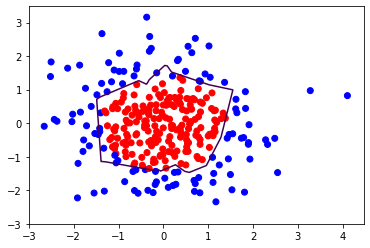

In [5]:
#定义神经网络的输入、参数和输出，定义前向传播过程
def get_weight(shape,regularizer):
    w=tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    #tf.add_to_collection('losses',((tf.nn.l2_loss(w) * 2) ** 0.5) * 0.5 * regularizer)  #tensorflow2.1
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))    #tfcpu1.13.0
    return w
def get_bias(shape):
    b=tf.Variable(tf.constant(0.01,shape=shape))
    return b
x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=get_weight([2,11],0.01)
b1=get_bias([11])
y1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=get_weight([11,1],0.01)
b2=get_bias([1])
y=tf.matmul(y1,w2)+b2#输出层不过激活

#定义损失函数
loss_mse=tf.reduce_mean(tf.square(y-y_))
loss_total=loss_mse+tf.add_n(tf.get_collection('losses'))

#定义反向传播方法：不含正则化
train_step=tf.train.AdamOptimizer(0.0001).minimize(loss_mse)
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS=40000
    for i in range(STEPS):
        start=(i*BATCH_SIZE)%300
        end=start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000==0:
            loss_mse_v=sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print("After %d steps,loss is:%f"%(i,loss_mse_v))
    #xx在-3到3之间以步长为0.01，yy在-3到3之间以步长为0.01，生成二维网格坐标点
    xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
    #将xx，yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid=np.c_[xx.ravel(),yy.ravel()]
    #将网格坐标点喂入神经网络，probs为输出
    probs=sess.run(y,feed_dict={x:grid})
    #probs的shape调整成xx的样子
    probs=probs.reshape(xx.shape)
    print("w1:\n",sess.run(w1))
    print("b1:\n",sess.run(b1))
    print("w2:\n",sess.run(w2))
    print("b2:\n",sess.run(b2))
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show


After 0 steps,loss is:5.470140
After 2000 steps,loss is:1.361546
After 4000 steps,loss is:0.368392
After 6000 steps,loss is:0.149153
After 8000 steps,loss is:0.099402
After 10000 steps,loss is:0.087243
After 12000 steps,loss is:0.080721
After 14000 steps,loss is:0.077000
After 16000 steps,loss is:0.075288
After 18000 steps,loss is:0.074483
After 20000 steps,loss is:0.074205
After 22000 steps,loss is:0.073998
After 24000 steps,loss is:0.073412
After 26000 steps,loss is:0.073110
After 28000 steps,loss is:0.073136
After 30000 steps,loss is:0.073131
After 32000 steps,loss is:0.073193
After 34000 steps,loss is:0.073194
After 36000 steps,loss is:0.073251
After 38000 steps,loss is:0.073291
w1:
 [[ 0.09804387 -0.01682776 -0.57771415  0.2978079  -0.2848169   0.20163265
  -0.05218034 -0.03524721 -0.14737977  0.32646954  0.77653295]
 [ 0.1981003  -0.06694373  0.35404617  0.5300075  -0.24647127 -0.5294678
  -0.01484409 -0.16960637 -0.1489435  -0.09894957  0.32610407]]
b1:
 [ 0.5913205   0.4489067 

<function matplotlib.pyplot.show(*args, **kw)>

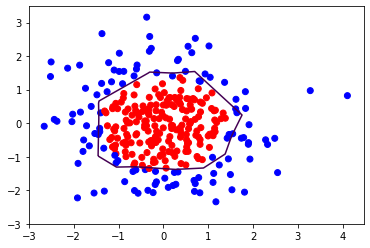

In [6]:
#定义反向传播算法：包含正则化
train_step=tf.train.AdamOptimizer(0.0001).minimize(loss_total)
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS=40000
    for i in range(STEPS):
        start=(i*BATCH_SIZE)%300
        end=start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000==0:
            loss_V=sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print("After %d steps,loss is:%f"%(i,loss_V))
             #xx在-3到3之间以步长为0.01，yy在-3到3之间以步长为0.01，生成二维网格坐标点
    xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
    #将xx，yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid=np.c_[xx.ravel(),yy.ravel()]
    #将网格坐标点喂入神经网络，probs为输出
    probs=sess.run(y,feed_dict={x:grid})
    #probs的shape调整成xx的样子
    probs=probs.reshape(xx.shape)
    print("w1:\n",sess.run(w1))
    print("b1:\n",sess.run(b1))
    print("w2:\n",sess.run(w2))
    print("b2:\n",sess.run(b2))
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show